# MATH 382 - Fall 2018
## Scientific Computing
Sang Yoon Lee

<hr>
# Final Project: PCA and K-means Clustering
<hr>

## Directions:

1. Write your name above.<br><br>

1. Follow the directions given in this document.<br><br>

1. Write the solutions of the eight problems below (code and text as needed) in this notebook and submit it in canvas.<br><br>

1. Don't use pandas, sckit-learn, or any other Python module for machine learning. Any results you obtained with Python modules or functions other than those described in this document will not earn you any credit.<br><br>

1. <b>Work on your own: Any indication of shared solutions, plagiarism, or any other dishonest conduct will be investigated thoroughly and, if confirmed, will result in a failing grade in the course and any further action contemplated by University policy. If you are unsure what I mean by this, please ask and/or check the University Catalog. According to CSUN's policy, a grade that is sanctioned due to academic dishonesty cannot be replaced by subsequent course grades.</b><br><br>

1. If you need help, you can ask me.

<hr>

## Preliminaries

Start by:
1. Creating a directory in your computer (or lab account) where you will save this notebook and the data files needed for the project:<br><br>

    1. Create a directory/folder named math382_final in a location you can easily remember and access (<em>e.g.</em>, your desktop, a folder previously created for the course, the documents folder in your user account, etc. <b>Do not create it in your Downloads folder!!!</b>)<br><br>

        1. Download this notebook and place/save it to the directory math382_final<br><br>

    1. Create a subdirectory inside math382_final named data.<br><br>
    
    1. Create another subdirectory inside math382_final named frames.<br><br>
        
2. Download the data for the project:<br><br>

    1. Go to <a>http://archive.ics.uci.edu/ml/datasets/seeds</a>, read the desription of the data, and click on <a href = "http://archive.ics.uci.edu/ml/machine-learning-databases/00236/">Data Folder</a><br><br>
    
    2. Download the file named "seeds_dataset.txt" and place/save it in the data subdirectory inside the directory math382_final<br><br>
    
3. Import the Python modules needed for the project (run the code cell below):

In [1]:
# Import libraries

# math library
import numpy as np

# pseudo random generator

import random as rnd

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# computational time
import time

# Part I: Principal Component Analysis (PCA)

<hr>

### References:

Here are two references on PCA, its applications, and algorithm:<br>

1. https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial <br><br>

1. https://sebastianraschka.com/Articles/2014_pca_step_by_step.html#introduction

    This page has very good information and examples, but probably more than you need. You shouldn't try to use the code presented here; it is good, but uses tools we haven't seen in class and will likely confuse you. You should use as a reference, not as a code resource.

<hr>

### How to Calculate the Principal Components of the data (see Problem 1B for further details)

There are several ways to find the principal components of a data matrix, here is a brief description of one possible way:

1. After you download the data for the project, you will store it into a matrix $X$ with each row ${\bf x}_{i}$ in $X$ representing a data sample with $d$ attributes

    $$ X = \begin{pmatrix} \overline{ \ \ \ } \!\!\!\! & {\bf x}_{1} & \!\!\!\!\!\!\!\! \overline{ \ \ \ } \\ \overline{ \ \ \ } \!\!\!\! & {\bf x}_{2} & \!\!\!\!\!\!\!\! \overline{ \ \ \ } \\ \ \ \ & \cdots & \ \ \ \\ \overline{ \ \ \ } \!\!\!\! & {\bf x}_{n} & \!\!\!\!\!\!\!\! \overline{ \ \ \ } \end{pmatrix} $$<br>

1. Normalize the data so its columns have zero mean and unit standard deviation.<br>

    $$ {\bf z}_j \leftarrow \frac{{\bf x}_j - \frac{1}{n}\sum_{i = 1}^n x_{ij}}{\sigma({\bf x}_j)}, \ \ \ j = 1, \dots, d$$. <br>

1. Find the covariance matrix of the data: $\Sigma = \dfrac{Z^TZ}{n-1}$.<br><br>

1. Find the eigen decomposition of $\Sigma$ and sort them in decreasing order.<br><br>

1. The first p principal components of the data are the first p eigen vectors of the data matrix.<br>

<hr>

## Problem 1A - 10 Points

<hr>

Load the data file into a numpy array named <tt>data</tt>, find its dimensions, and store the first seven columns into a numpy array named $X$. (The data in this file is not separated by commas).

<hr>

In [3]:
#Enter your code here
data = np.loadtxt('data/seeds_dataset.txt')
n, d1 = data.shape
d = d1 - 1

X = data[:,0:d]

print data.shape
print X.shape

(210L, 8L)
(210L, 7L)


<hr>

## Probem 1B - 40 Points

<hr>

Write a function named <tt>myPCs(X,p)</tt> that takes as input a (data) numpy array $X$ (with each row representing a data sample) of size $m \times d$ and the number of principal components $p < d$ desired, and retruns as output a numpy array $Z$ with the normalized values of $X$, and a numpy array $U_p$ with those principal components as column vectors.<br>

The Function should perform the following tasks (preferably in this order), ${\bf x}_i$ denotes a row vector and ${\bf x}_j$ and ${\bf z}_j$ denote column vectors:<br>

1. Normalize the entries of the matrix. That is: subtract from each row ${\bf x}_i = (x_{i1}, x_{i2}, \dots, x_{id})$ of $X$ a one dimensional numpy array holding the mean of each column and divide each column by its standard deviation

    $$ {\bf z}_j \leftarrow \frac{{\bf x}_j - \frac{1}{n}\sum_{i = 1}^n x_{ij}}{\sigma({\bf x}_j)}, \ \ \ \ \ \ j = 1, \dots, d.$$

    Verify that the rows of $Z$ have mean $0$ and standard deviation $1$ by printing <tt>Z.mean(axis = 0)</tt>and <tt>Z.std(axis = 0)</tt>. The first should return an array of zeros (or very small numbers) of length $d$, and the second an array of ones of length $d$. <br><br>

1. Calculate the covariance matrix of $X$, $cov(X) = \Sigma = \dfrac{Z^T Z}{n-1}$. <br><br>

1. Find the eigen decomposition of the covariance matrix $\Sigma = U D U^T$ and <b>sort</b> its eigen values and corresponding eigen vectors in decreasing order (see the partial code provided below). <br><br>

1. The first $p$ columns of the matrix $U$ (first $p$ eigen vectors of $\Sigma$) are the principal components.<br><br>

Use your function to obtain the normalized data $Z$, and $U_p$ for $p = 2$.

<hr>

(210L, 7L)
mean after= [ -1.89530931e-15  -2.58576229e-15   1.32585741e-15  -4.00737644e-15
  -2.64867493e-16   5.95291012e-16  -1.46972381e-16]
std after= [ 1.  1.  1.  1.  1.  1.  1.]


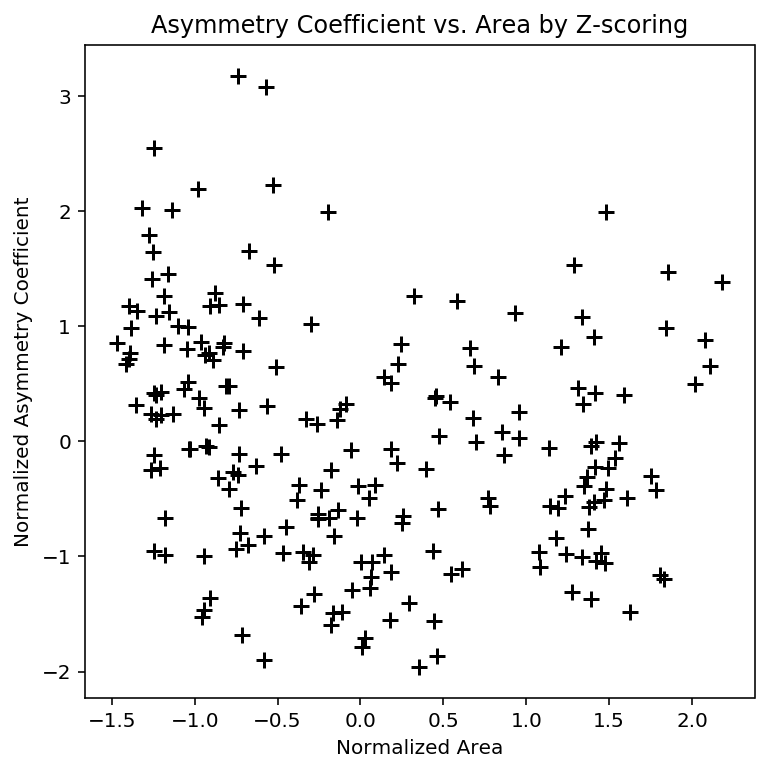

In [4]:
#Enter your code here

def myPCs(X,p):
    M = X.mean(axis = 0)*np.ones((1,d))
    h = np.ones((n,1))
    Z = (X - h.dot(M))/np.std(X,axis = 0)
    
    # Calculate Sigma
    Sigma = Z.T.dot(Z)/(n-1)
    # Calculate eigen decomposition of Sigma
    evals, U = np.linalg.eig(Sigma)
    # lines for sorting eigen values and eigen vectors -- don't change
    idx = evals.argsort()[::-1] # decreasing order
    columns = idx.shape[0]
    evals = evals[idx[0:columns]]
    total_sum = np.sum(evals) #trace
   
    U = U[0:columns,idx[0:columns]]
    Up = U[:, 0:2]
    
    return Z, Up

p = 2
Z, Up = myPCs(X,p)


print Z.shape
print'mean after=', np.mean(Z,axis=0)
print'std after=', np.std(Z,axis=0)
    
ZT = Z.T
plt.figure(3,figsize=(6,6))
plt.scatter(ZT[0,:], ZT[5,:], s=60, c='k', marker='+') 
plt.xlabel('Normalized Area')
plt.ylabel('Normalized Asymmetry Coefficient')
plt.title('Asymmetry Coefficient vs. Area by Z-scoring')
plt.show()


<hr>

## Problem 1C - 20 Points

<hr>

Find the projection of the normalized data $Z$ onto the first <b>two</b> principal components of $X$, $Z_p = ZU_p$. What are the dimensions of $Z_p$?

<hr>

In [5]:
# Enter your code here

Zp = (Z).dot(Up)

print 'Dimensions of Z_p =', Zp.shape, '\n'
print 'Zp[0:4, :] =', Zp[:5,:], '\n'

Dimensions of Z_p = (210L, 2L) 

Zp[0:4, :] = [[ 0.31704705 -0.78366902]
 [-0.00338618 -1.91321367]
 [-0.45944334 -1.90722525]
 [-0.59193565 -1.93106922]
 [ 1.10291005 -2.06809003]] 



<hr>

## Problem 1D - 30 Points

<hr>

Explain in your own words:<br>

1. What is the purpose of finding the Principal Components of the data $X$ and projecting the data onto them?<br>

A) This is potentially valuable for application in which most of the variation, or many range, in the data is due to variation in only a few of the new variables. It decreases size of data for storage without losing many data. Roughlt speaking, the goal is to find a special linear combination of the data which is an effective way to suppress information and provide only a few composite data which contains most of the information from initial data.

1. Why are the Principal Components relevant and the projection of the data into the reduced subspace still provides a good description of the data?<br>

A) The eigenvector of the covariance matrix are called principal components The first principal component is the lagest and the second is the next and so on. When they hold the data, the first and second componenet hold almost whole information of the data. And first and second principal component determines the new variable and this value is much larger than the others, this fact will permit us to view the data as essentially less demention rather than multi-demention. and least square(norm) give us the minimuzed error which means optimized data.

<hr>

# Part II. K-means Clustering

<hr>

### References:

Read about $K$-means clustering and the algorithm to cluster data here:<br>

https://www.datascience.com/blog/k-means-clustering <br>

### Algorithm:

1. Randomly select $K$ data points from the data set as the centroids of the clusters (the centroids don't need to be data points from the data set, but their coordinates should be within those of the data). <br><br>

2. Assign each data point in the set, to the cluster whose centroid is closest to it.<br><br>

3. After every data point has been assigned to a cluster, update the coordinates of the centroid of each cluster as the mean of the coordinates of the data points in the cluster.<br><br>

4. Repeat 2. and 3. above until the centroids are stabilized.


<hr>

## Problem 2A - 30 Points

<hr>

Write a function named <tt>centroid_init(Z,K)</tt> that takes as input a data numpy array $Z$ and the number $K$ of clusters to group the data into, and returns as output a numpy array $C$ with the initial coordinates of the $K$ centroids of the clusters and one dimensional array <tt>c_indx</tt> with the indeces (<em>i.e.</em>, row indeces of $Z$) randomly selected as the initial cluster centroids. <br>

When selecting the row indeces of the data array that will serve as initial centroids, make sure the random indeces are unique. One possibility is to break the number of data samples, $n$, into $K$ subsets (of size $n/K$) and pick one index from each subset. <br>

You may want to use the function <tt>randint()</tt> of the Python random module (loaded above as <tt>rnd</tt>). The Python command<br>

Use the funtion to initialize $3$ centroids from the projected data in array $Z_p$ from Problem 1C.

<hr>

In [6]:
# Enter your code here

def centroid_init(Z,K):

    n, p = Z.shape
   
    c_index = np.zeros(K, 'int')
    
    a = 0
    b = n/K-1
   
    for k in range(0,K):
        c_index[k] = rnd.randint(a,b)
        a += n/K 
        b += n/K
        
    C = np.zeros((K,p), 'double')
    C = Z[c_index,:]
    
    return C, c_index

K = 3
C, c0_index = centroid_init(Zp,K)

print 'Coordinates of initial centroids of clusters:', '\n'
print 'C =', C, '\n'
print 'Randomly selected data points as initial centroids:', '\n'
print 'c0_index =', c0_index, '\n'

Coordinates of initial centroids of clusters: 

C = [[ 1.85493815 -1.0888628 ]
 [ 3.41972134  1.57821846]
 [-1.59065129 -0.42255533]] 

Randomly selected data points as initial centroids: 

c0_index = [ 37  87 195] 



<hr>

## Problem 2B - 30 Points

<hr>

Write a function named <tt>cluster_membership(Z,C)</tt> that takes as input two numpy arrays, a data array $Z$, and an array holding the centroid coordinates $C$, and returns as output a two dimensional numpy array of type interger, <tt>member_iter</tt>, and size $n \times 1$ with each row indicating the cluster number ($k = 1, 2, \dots, K$) the data sample ${\bf z}_i$, $i = 0, 1, \dots, n-1$, belongs to. Your function should:<br>

1. Find the number $K$ of centroids from the size of $C$.<br><br>

1. Find the dimensions, $n \times p$, of the data array $Z$.<br><br>

1. Create a one dimensional array $D$ of size $K$ to hold the $L_2$ distances of each data sample ${\bf z}_i$, $i = 0, 1, \dots, n-1$, from each centroid.<br><br>

1. Create the two dimensional array <tt>member_iter</tt> decribed above.<br><br>

1. For each data sample ${\bf z}_i$, $i = 0, 1, \dots, n-1$:<br><br>

    1. Find the distance of the sample point to each of the centroids and store them into D.<br><br>
    
    2. Use the numpy function <tt>argmin()</tt> to select the index corresponding to the minimum of those $K$ distances and store that index into <tt>member_iter[i,0]</tt>. <br><br>

1. Return the integer array <tt>member_iter</tt>.<br><br>

In order to verify your code, you can run the normalized, projected data stored in $Z_p$ with the centroids calculated in Problem 2A and check that the entries of the array <tt>member_iter</tt> are between $1$ and $3$. 
    
<hr>

In [7]:
# Enter your code here

def cluster_membership(Z,C):

    K = C.shape[0]
    n, p = X.shape
    D = np.zeros(K, 'double')
    member_iter = np.ones((n,1), 'int')

    for i in range(0,n):
        for k in range(0,K):
            D[k] = np.linalg.norm(C[k,:] - Z[i,:])
            member_iter[i,0] = D.argmin() + 1
    return member_iter

member_iter = cluster_membership(Zp,C)

print 'member_iter[:10,0] =', member_iter[:10,0], '\n'
print 'member_iter[-15:,0] =', member_iter[-15:,0], '\n'

member_iter[:10,0] = [1 1 3 3 1 3 3 3 1 1] 

member_iter[-15:,0] = [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3] 



<hr>

## Problem 2C - 30 Points

<hr>

Write a function named <tt>centrod_update(Z,member_iter,K)</tt> that takes as input two two-dimensional numpy arrays, a data array $Z$, and the current cluster membership array <tt>member_iter</tt>, along with the number of klusters $K$; and returns a two dimensinal numpy array $C$ of dimensions $K \times p$ with the updated coordinates of the centroids for each cluster $k = 1, 2, \dots, K$ (the average of the coordinates of the sample points belonging to cluster $k$).<br><br>

Your function should:<br>

1. Find the number $p$ of attributes of the projected data $Z_p$.<br><br>

2. Create the two dimensional array $C$ of dimensions $K \times p$ where the updated centroid coordinates will be stored.<br><br>

3. For each cluster $k = 1, \dots, K$:<br><br>

    1. Find the indeces of the data samples that belong to the cluster (<em>i.e.</em>, <tt>cluster_index = (member_iter == k+1)</tt>).<br><br>
    
    2. Find the average of each coordinate of the data points belonging to the cluster.<br><br>
    
4. Return the update array $C$.<br>

Test the function by calling it with $Z_p$, $K =3$, and the array <tt>member_item</tt>, returned by <tt>cluster_membership</tt> in Problem 2B.

<hr>

In [8]:
# Enter your code here

def centroid_update(Z,member_iter,K):

    n, p = Z.shape
   
    C = np.zeros((K,p), 'double')

    for k in range(0,K):
        cluster_index = (member_iter == k + 1)
        C[k,:] = Z[cluster_index[:,0],:].mean(axis = 0)

    return C

C = centroid_update(Zp,member_iter, 3)
print 'C =', C, '\n'

C = [[ 1.54387554 -0.56402751]
 [ 3.14374304  0.86556285]
 [-1.71891114 -0.0206263 ]] 



<hr>

## Problem 2D - 20 points

<hr>

Explain in your own words (and with proper math typesetting):<br><br>

1. What is the objective function minimized by the $K$-means algorithm?<br><br>
A) The objective function is a distance function which is refer to Norm as the square error of all the cluster<br><br>

1. Explain how it is possible that the objective function is minimized by the algorithm as described here without using any explicit optimization algorithm such as gradient descent?<br><br>
A) The goal of k-means is to find a way of dividing the original dataset into K-cluster susch that the objectve function minimized. But we can observe two things. First, when cluster center is fixed, we can easily identify the correspond matrix such that objective function minimized. Second, when membership matrix is fixed, we can easily find the optimizing centers such that the objective function minimized.  Since our Norm is the square error, the minimizing center of the each cluster is the mean vector of the all data points in the cluster. It gives the best center of the cluster after each iteration of the objective function assign more nearest center until the objective function does not improve much.<br> 

<hr>

## Problem 3 - 90 Points

<hr>

You have now defined all the functions you need for grouping normalized data into $K$ different clusters based on its principal components. You should also have the data from the file "seeds_dataset.txt" normalized ($Z$) and projected onto its two first principal components ($Z_p$). Follow the directions below to write and run code to grop the seeds dataset into $K = 3$ clusters and plot those clusters:<br><br>

1. Set the maximum number of iterations for the $K$-means algorithm to 100, <tt>max_iter = 100</tt>.<br><br>

1. Create a two dimensional numpy array of ones named membership with dimensions $n \times \text{max_iter}$.<br><br>

1. Create a two dimensional array of type <tt>bool</tt> and dimensions $n \times K$ to keep track of the membership of each data point for plotting purposes: <tt>cluster_index = np.ones((n,K), 'bool')</tt>.<br><br>

1. Set the number of clusters to $K = 3$.<br><br>

1. Initialize the centroids by calling the function <tt>centroid_init(Z,K)</tt>: C, c0_indx = centroid_init(Zp,K)</tt> <br><br>

1. Initialize two integer variables: a counter for the number of iterations to perform $K$-means clustering, <tt>j = 1</tt>, and a second counter to keep track of membership changes at each iterations, <tt>member_change = 1.</tt> <br><br>

1. Write a while loop to run the two main steps of the $K$ means algorithm, <tt>cluster_membership(Z,C)</tt> and <tt>centroid_update(Zp,K,member_iter)</tt>, until either the maximum number of iterations <tt>max_iter = 100</tt> is reached, or there are no more membership changes <tt>member_change = 0</tt>. Inside this loop, the code should:<br><br>

    1. Reset the counter <tt>member_change</tt> counter to $0$.<br><br>
    
    1. Update the <tt>member_iter</tt> array by calling <tt>cluster_membership(Zp,C)</tt>.<br><br>
    
    1. Updete the array $C$ with the centroids of the clusters by calling <tt>centroid_update(Zp, member_iter, K)</tt>.<br><br>
    1. Record the new membership indeces: <tt>membership[:,j] = member_iter[:,0]</tt>.<br><br>
    
    1. Find the number of membership changes in the iteration by comparing the entries in columns $j$ and $j+1$ of the <tt>membership</tt> array.<br><br>
    
    1. Assign the first coordinate/attribute of the normalized data, <tt>Zp[:,0]</tt>, to a one dimensional array <tt>z1</tt>, and the second, <tt>Zp[:,1]</tt>, to a one dimensional array <tt>z2</tt>. <br><br>
    
    1. Create a pyplot figure, <tt>plt.figure(1)</tt>, and clear it,  <tt>plt.clf()</tt>.<br><br>
    
    1. For each cluster $k = 1, \dots, K$, flag its corresponding coulumn in the array <tt>cluster_index</tt> by using<br><br>
    <tt>cluster_index[:,k] = (membership[:,j] == k + 1)</tt>.<br><br>
    
    1. Use the flags in <tt>cluster_index[:,k]</tt>, to plot (with <tt>plt.scatter</tt>) the (coordinates of the) points in cluster $k = 1, \dots, K$.<br><br>
    
    1. Plot the coordinates of the centroids in the same plot:<br>
    
    <tt>plt.scatter(C[:,0], C[:,1], c = 'k', marker = '*', linewidths=3)</tt><br><br>
    
    1. Create a file name for the figure to be saved and save it:<br>
    
    <tt>outfile = "frames/clusters_%0.3d.png" % j</tt><br>
    <tt>plt.savefig(outfile)</tt><br><br>
    
    1. Update the $K$-means iteration counter: <tt>j += 1</tt>.<br>
    
Run the code to cluster the data in $Z_p$ into $K = 3$ clusters. You should get a few plots saved as png files in the folder frames you created inside the <tt>math382_final</tt>.
    
<hr>

Final centroids: 

C = [[-0.51330929 -1.06366716]
 [ 2.67628059  0.39336496]
 [-2.3880096   0.7588527 ]] 



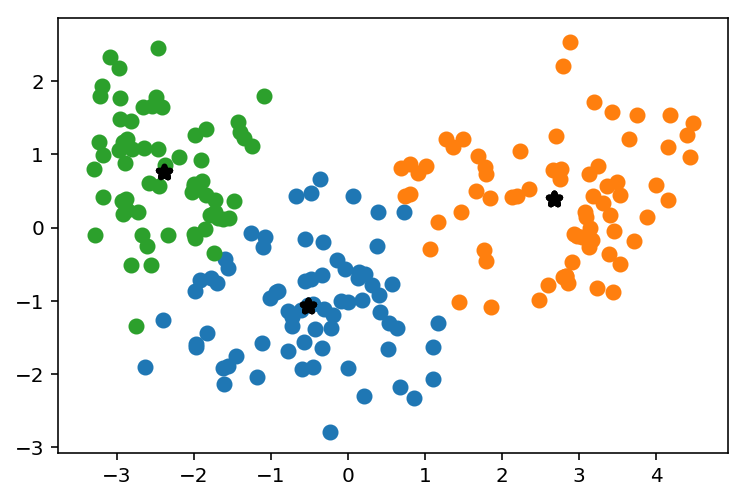

In [15]:
# Enter your code here
max_iter = 100
membership = np.ones((n,max_iter), 'int')
membership0 = data[:,d][:,None]
membership[:,0] = membership0[:,0]

K = 3
cluster_index = np.ones((n,K), 'bool')
C, c0_index = centroid_init(Zp,K) 

j = 1
member_change = 1

Y = Up.T.dot(Z.T)
YT = Y.T

while j < max_iter and member_change > 0:

    member_change = 0

    member_iter = cluster_membership(Zp,C)
    C = centroid_update(Zp, member_iter, K)
    membership[:,j] = member_iter[:,0]

    for m in range(0,n):
          if membership[m,j] != membership[m,j-1]:
                member_change += 1

   
    Y = Up.T.dot(Z.T)
   

    z1 = Y[0,:]
    z2 = Y[1,:]
    
    
    
    for k in range(0, K):
        cluster_index[:,k] = (member_iter[:,0] == k + 1)
    
    plt.figure(1)
    plt.clf()

    for k in range(0,K):
        
        
        plt.scatter(z1[cluster_index[:,k]],z2[cluster_index[:,k]], linewidths=2)
        plt.scatter(C[:,0], C[:,1], c = 'k', marker = '*', linewidths=3)
        outfile = "frames/clusters_%0.3d.png" % j
        plt.savefig(outfile)
        
        j += 1
        
print 'Final centroids:', '\n'
print 'C =', C, '\n'
